<a href="https://colab.research.google.com/github/prawizard/TweetsClassification_NLP/blob/main/BERT/TweetEval_EmotionTweetsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions to Execute:

    *   To execute by loading my trained model and evaluating on test data:


1.   

    #### Go to the following drive link where you can access the weights from my goole drive.

    https://drive.google.com/drive/folders/1NyLnCuDTWg476bTpihzhECd54EQjNMma?usp=sharing

    #### Download the Folder 'Emotion_ModelWeights'. If it is downloaded as a zip file, please extract the folder. 

    #### Upload the extracted folder 'Emotion_ModelWeights' to your Google Drive. You will mount your drive in colab runtime and access the .h5 file from there. This way is faster than loading the .h5 file directly to colab due to the large size (~1.1 GB).

    #### The trained weights couldn't be uploaded on GitHub as well due to the large size, hence, we will access from Google Drive.
    
    #### Further instructions on how to do this are provided in Section 14.

2. #### Run all cells in sections from Section No. **1 to 7 ONLY**.

3. #### Skip the cells afterwards until **Section 14**.

4. #### **Execute the cells in Section 14**. Last cell in this section provides the **F1-Score and Accuracy obtained by the model on test set**.



    *   To execute by training the model from scratch and then evaluating on test data.



#### Execute the Sections from Section No 1 to 12. Section 13 can be ignored, as it is just saving the model.

#### Section 14 is to mount your drive on colab and to load the weights(You will have to upload the weights folder from my drive link to your drive before running Section 14 as described in the previous instruction.). Hence, if you're not using my trained model, this section can be ignored too.




# 1 : Install/import the required libraries

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 128kB/s 
     |████████████████████████████████| 6.8MB 40.2MB/s 
     |████████████████████████████████| 983kB 38.9MB/s 
     |████████████████████████████████| 266kB 41.3MB/s 
     |████████████████████████████████| 1.9MB 38.3MB/s 
     |████████████████████████████████| 1.2MB 35.0MB/s 
     |████████████████████████████████| 471kB 37.9MB/s 
     |████████████████████████████████| 901kB 37.7MB/s 
     |████████████████████████████████| 3.3MB 37.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=7eb64fa7bd1529112b996660879b102aabaeb549f08750eac1fd2c23a6491056
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=a1d2b3bad43e9649bcaa4e5cf5f84dc31dc936f12e4e17bf100af0a9a8800514
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf
import re
import requests
import sklearn.metrics
import matplotlib.pyplot as plt

# 2 : Define Constants

In [ ]:
TRAIN_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt"
TRAIN_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt"
VAL_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt"
VAL_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt"
TEST_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt"
TEST_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt"
VOCAB_SIZE=2000

# 3 : Fetch the Data using URLs

In [ ]:
r = requests.get(TRAIN_TEXT_URL, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r = requests.get(TRAIN_LABELS_URL, allow_redirects=True)
open('train_labels.txt', 'wb').write(r.content)

r = requests.get(VAL_TEXT_URL, allow_redirects=True)
open('val_text.txt', 'wb').write(r.content)

r = requests.get(VAL_LABELS_URL, allow_redirects=True)
open('val_labels.txt', 'wb').write(r.content)

r = requests.get(TEST_TEXT_URL, allow_redirects=True)
open('test_text.txt', 'wb').write(r.content)

r = requests.get(TEST_LABELS_URL, allow_redirects=True)
open('test_labels.txt', 'wb').write(r.content)

2842

# 4 : Access the data from files

In [ ]:
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()
val_stream=open("val_text.txt")
val_tweets=val_stream.readlines()
val_stream.close()
test_stream=open("test_text.txt")
test_tweets=test_stream.readlines()
test_stream.close()

# Labels
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()
val_stream=open("val_labels.txt")
val_tweetsLabels=val_stream.readlines()
val_stream.close()
test_stream=open("test_labels.txt")
test_tweetsLabels=test_stream.readlines()
test_stream.close()


# Labels
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
val_labels=[0]*len(val_tweetsLabels)
for i in range(len(val_tweetsLabels)):
  if val_tweetsLabels[i].find('\n')!=-1:
    val_labels[i]=int(re.sub('\n', '', val_tweetsLabels[i]))
test_labels=[0]*len(test_tweetsLabels)
for i in range(len(test_tweetsLabels)):
  if test_tweetsLabels[i].find('\n')!=-1:
    test_labels[i]=int(re.sub('\n', '', test_tweetsLabels[i]))

In [ ]:
print('Samples in Training set : ',len(labels),', Validation set : ', len(val_labels),', Test set : ', len(test_labels))

Samples in Training set :  3257 , Validation set :  374 , Test set :  1421


# 5 : Data Cleaning

## 5.1 : Remove the twitter handles

In [ ]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    tweets[i]=re.sub('@user', '', tweets[i])
    tweets[i]=re.sub('#+', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('@user')!=-1:
    val_tweets[i]=re.sub('@user', '', val_tweets[i])
    val_tweets[i]=re.sub('#+', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('@user')!=-1:
    test_tweets[i]=re.sub('@user', '', test_tweets[i])
    test_tweets[i]=re.sub('#+', '', test_tweets[i])

## 5.2 : Remove the unnecessary hashtags

In [ ]:
for i in range(len(tweets)):
  if tweets[i].find('#[a-zA-Z]+')!=-1:
    tweets[i]=re.sub('#[a-zA-Z]+', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('#[a-zA-Z]+')!=-1:
    val_tweets[i]=re.sub('#[a-zA-Z]+', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('#[a-zA-Z]+')!=-1:
    test_tweets[i]=re.sub('#[a-zA-Z]+', '', test_tweets[i])

## 5.3 : Remove characters like \\n and unnecessary dots

In [ ]:
for i in range(len(tweets)):
  if tweets[i].find('\n')!=-1:
    tweets[i]=re.sub('\n', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('\n')!=-1:
    val_tweets[i]=re.sub('\n', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('\n')!=-1:
    test_tweets[i]=re.sub('\n', '', test_tweets[i])

# Unnecessary dots
p='\.\.\.|\.\.'

for i in range(len(tweets)):
  tweets[i]=re.sub(p, '', tweets[i])
  tweets[i]=tweets[i].lower()

for i in range(len(val_tweets)):
  val_tweets[i]=re.sub(p, '', val_tweets[i])
  val_tweets[i]=val_tweets[i].lower()

for i in range(len(test_tweets)):
  test_tweets[i]=re.sub(p, '', test_tweets[i])
  test_tweets[i]=test_tweets[i].lower()

# 6 : Store the Data Processed In a Data Frame

In [ ]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
train_df=pd.DataFrame(rows, index=rowIndices)

val_rows=[]
val_rowIndices=[]
for i in range(len(val_tweets)):
  val_rows.append({"TWEET":val_tweets[i], "CATEGORY":val_labels[i]})
  val_rowIndices.append(i+1)
val_df=pd.DataFrame(val_rows, index=val_rowIndices)

test_rows=[]
test_rowIndices=[]
for i in range(len(test_tweets)):
  test_rows.append({"TWEET":test_tweets[i], "CATEGORY":test_labels[i]})
  test_rowIndices.append(i+1)
test_df=pd.DataFrame(test_rows, index=test_rowIndices)

In [ ]:
train_df.CATEGORY.value_counts()

0    1400
3     855
1     708
2     294
Name: CATEGORY, dtype: int64

In [ ]:
anger_count=train_df.CATEGORY.value_counts()[0]
joy_count=train_df.CATEGORY.value_counts()[1]
optimism_count=train_df.CATEGORY.value_counts()[2]
sadness_count=train_df.CATEGORY.value_counts()[3]

<function matplotlib.pyplot.show>

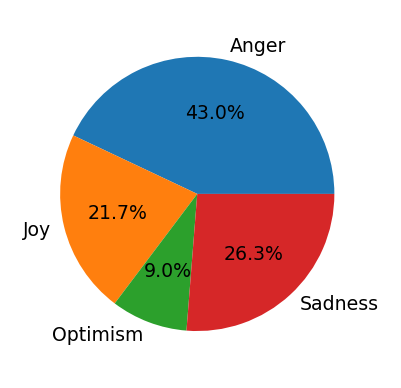

In [ ]:
categoryNames=['Anger', 'Joy', 'Optimism', 'Sadness']
sizes=[anger_count, joy_count, optimism_count, sadness_count]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

# 7 : Segregate the Data Into Training and Validation/Dev Set

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train_df,
                                                                   text_column = 'TWEET',
                                                                   label_columns = 'CATEGORY',
                                                                   val_df = val_df,
                                                                   maxlen = 65,
                                                                   preprocess_mode = 'bert')

['CATEGORY_0', 'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3']
   CATEGORY_0  CATEGORY_1  CATEGORY_2  CATEGORY_3
1         0.0         0.0         1.0         0.0
2         1.0         0.0         0.0         0.0
3         0.0         1.0         0.0         0.0
4         1.0         0.0         0.0         0.0
5         0.0         0.0         0.0         1.0
['CATEGORY_0', 'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3']
   CATEGORY_0  CATEGORY_1  CATEGORY_2  CATEGORY_3
1         1.0         0.0         0.0         0.0
2         1.0         0.0         0.0         0.0
3         1.0         0.0         0.0         0.0
4         1.0         0.0         0.0         0.0
5         1.0         0.0         0.0         0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


# * For loading my trained weights and evaluating instead of training the model again, skip all the cells below until the Section number 14 " (Running the Model Using Weights (Pretrained))" and run all the cells that follow thereafter. *

# Instructions on how the trained weights can be loaded are provided in that section. (Number 14)

# *Otherwise, To Train The Model Again, Continue Executing the Cells Below Until the Section 12 "(Running the Model Using Weights (Pretrained))". Section 12 gives the result after training the model again and evaluating on test data. *

# 8 : Using BERT for pretrained weights

In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 65
done.


# 9 : Tuning the hyper parameters

In [ ]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 3)

# 10 : Fit the Model

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 3)

predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/My Drive/bert')



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1086/1086 [==============================] - 358s 313ms/step - loss: 1.1576 - accuracy: 0.4772 - val_loss: 0.5872 - val_accuracy: 0.7995
Epoch 2/3
1086/1086 [==============================] - 331s 305ms/step - loss: 0.4856 - accuracy: 0.8282 - val_loss: 0.5678 - val_accuracy: 0.7781
Epoch 3/3
1086/1086 [==============================] - 331s 305ms/step - loss: 0.1661 - accuracy: 0.9480 - val_loss: 0.6696 - val_accuracy: 0.7968


# 11 : Evaluate the Model Performance on Test Data

In [ ]:
data = test_df['TWEET'].tolist()

In [ ]:
bert_pred=predictor.predict(data)

In [ ]:
bert_pred[:10]

['CATEGORY_3',
 'CATEGORY_0',
 'CATEGORY_3',
 'CATEGORY_1',
 'CATEGORY_1',
 'CATEGORY_0',
 'CATEGORY_3',
 'CATEGORY_3',
 'CATEGORY_1',
 'CATEGORY_0']

In [ ]:
y_true=np.array(test_df['CATEGORY'].tolist())

In [ ]:
y_true[:10]

array([3, 0, 3, 1, 1, 0, 3, 3, 3, 0])

In [ ]:
res_bert=[]
for i in range(len(bert_pred)):
  if bert_pred[i]=='CATEGORY_0':
    res_bert.append(0)
  elif bert_pred[i]=='CATEGORY_1':
    res_bert.append(1)
  elif bert_pred[i]=='CATEGORY_2':
    res_bert.append(2)
  else:
    res_bert.append(3)

# 12 : Accuracy and F1-Score

In [ ]:
res_bert=np.array(res_bert)
np.mean(res_bert==y_true)

0.8142153413089374

In [ ]:
F1_SCORE=sklearn.metrics.f1_score(y_true, res_bert, average='macro')
print('F1-SCORE OBTAINED :',round(F1_SCORE*100, 2))

F1-SCORE OBTAINED : 78.38


# 13 : Saving the Trained Weights

In [ ]:
predictor.save('/content/EmotionTrainedWeights/Weights')

In [ ]:
!zip -r /content/Emotion_Weights.zip /content/EmotionTrainedWeights/Weights

  adding: content/EmotionTrainedWeights/Weights/ (stored 0%)
  adding: content/EmotionTrainedWeights/Weights/tf_model.preproc (deflated 52%)
  adding: content/EmotionTrainedWeights/Weights/tf_model.h5 (deflated 18%)


In [ ]:
from google.colab import files
files.download('/content/Emotion_Weights.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 14 : Running the Model Using Weights (Pretrained)

### Run the cell below. 
* You must have uploaded my trained weights folder to your drive, as described at the top of this notebook. Use the same google account here to which you uploaded my weights folder. *
### 1. Click on the link following "Go to this URL in a browser:"
### 2. Select your google account/ Sign-in to your google account.
### 3. Click 'Allow'
### 4. Copy the link in that tab and paste it in the box provided. (With the box label 'Enter your authorization code:') Use Ctrl+V to paste as right click to paste might not work.
### 5. Hit the Enter Key. Now you can see the folder 'gdrive' with files/folders in your drive ready for access in colab runtime. 

### We will use these weights folders to load the trained weights and evaluate the model.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Emotion_ModelWeights' Emotion_Weights_Drive

Mounted at /content/gdrive
cp: -r not specified; omitting directory '/content/gdrive/My Drive/Emotion_ModelWeights'


### Load the weights

In [ ]:
predictor_load = ktrain.load_predictor('/content/gdrive/My Drive/Emotion_ModelWeights')

## Evaluate on Test Data Using these loaded weights

In [ ]:
data = test_df['TWEET'].tolist()

In [ ]:
bert_pred_load=predictor_load.predict(data)

In [ ]:
y_true=np.array(test_df['CATEGORY'].tolist())

In [ ]:
res_bert_load=[]
for i in range(len(bert_pred_load)):
  if bert_pred_load[i]=='CATEGORY_0':
    res_bert_load.append(0)
  elif bert_pred_load[i]=='CATEGORY_1':
    res_bert_load.append(1)
  elif bert_pred_load[i]=='CATEGORY_2':
    res_bert_load.append(2)
  else:
    res_bert_load.append(3)

## ACCURACY and F1_SCORE

In [ ]:
res_bert_load=np.array(res_bert_load)
print('ACCURACY OBTAINED :', round(np.mean(res_bert_load==y_true)*100,2))

ACCURACY OBTAINED : 81.42


In [ ]:
F1_SCORE=sklearn.metrics.f1_score(y_true, res_bert_load, average='macro')
print('F1_SCORE OBTAINED :', round(F1_SCORE*100, 2))

F1_SCORE OBTAINED : 78.38


In [ ]:
# while True:pass